In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("table_chapter5.csv")

In [31]:
class1 = data[["x1w1","x2w1"]].values
class2 = data[["x1w3","x2w3"]].values

In [146]:
norms1 = np.linalg.norm(class1, axis=1, keepdims=True)
class1_norm = class1/norms1

norms2 = np.linalg.norm(class2, axis=1, keepdims=True)
class2_norm = class2/norms2

In [19]:
def perceptron_criterion(a,m):
    suma=0
    for y in m:
        suma += np.dot(a,y)
    return suma

In [97]:
def misclassified(a,class1,class2):
    missed1 = []
    missed2 = []
    missed = []
    for obs in class1:
        if np.dot(a,obs)<0:
            missed1.append(obs)
            missed.append(obs)
    for obs in class2:
        if np.dot(a,obs)<0:
            missed2.append(obs)
            missed.append(obs)
    return missed,missed1,missed2

In [98]:
def gradient_perceptron(m):
    return np.sum(m,axis=0)

In [155]:
def gradient_descent(a0,theta,eta,maxit):
    '''Consider eta is fixed'''
    iteration = 0
    a = a0
    missed = misclassified(a,class1,class2)[0]
    gradient = gradient_perceptron(missed)
    print(np.linalg.norm(eta*gradient))
    while np.linalg.norm(eta*gradient)>theta and iteration<maxit:
        a = a+eta*gradient
        missed = misclassified(a,class1,class2)[0]
        gradient = gradient_perceptron(missed)
        iteration+=1
        #print(iteration)
    print(iteration)
    print(np.linalg.norm(eta*gradient))
    return a

In [166]:
a0 = np.array([1,1])
a_solution = gradient_descent(a0,theta=0.005,eta=0.01,maxit=100000)

0.20529490982486637
100000
0.14094325099131208


In [167]:
a_solution

array([0.184, 0.373])

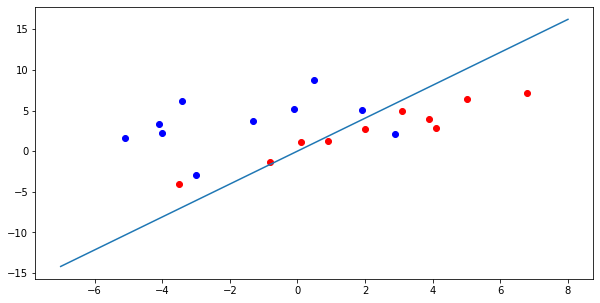

In [168]:
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(class1[:,0],class1[:,1],color="r")
ax.scatter(class2[:,0],class2[:,1],color="b")
x = np.linspace(-7,8)
y = lambda x: (a_solution[1]/a_solution[0])*(x-a_solution[0])+a_solution[1]
ax.plot(x,y(x))
#plt.plot(*zip(point1, point2), marker='o')